- Analysis and modeling for [Hr Analytics Job Prediction](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv) on Kaggle


In [75]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Load datase

In [41]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


### EDA

In [42]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [43]:
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [44]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [45]:
df0 = df0.rename(columns={'average_montly_hours':'average_monthly_hours', 'Work_accident':'work_accident', 'Department':'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [46]:
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [47]:
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [48]:
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [49]:
df0 = df0.drop_duplicates()
df0.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


#### Check outliers

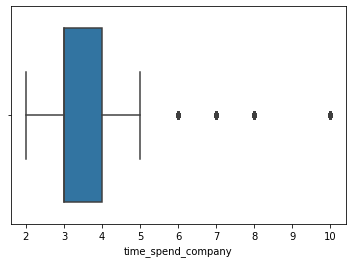

In [50]:
sns.boxplot(x=df0['time_spend_company'])
plt.show()

In [51]:
iqr = df0['time_spend_company'].quantile(0.75) - df0['time_spend_company'].quantile(0.25)
upper_limit = df0['time_spend_company'].quantile(0.75) + iqr * 1.5
df0[df0['time_spend_company']>upper_limit].shape

(824, 10)

In [52]:
print(df0['left'].value_counts())

print(df0['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### visualization

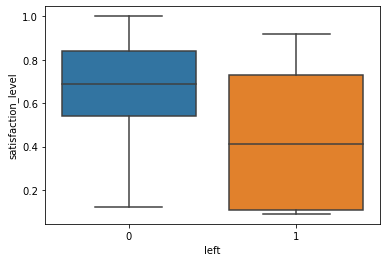

In [57]:
sns.boxplot(data=df0, x='left', y='satisfaction_level')

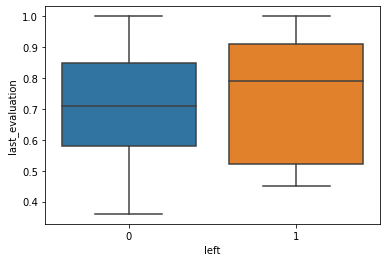

In [56]:
sns.boxplot(data=df0, x='left', y='last_evaluation')

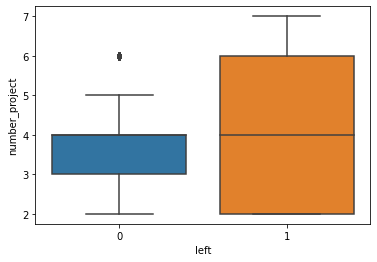

In [58]:
sns.boxplot(data=df0, x='left', y='number_project')

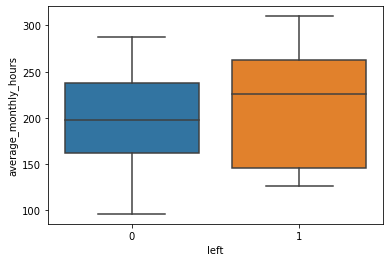

In [59]:
sns.boxplot(data=df0, x='left', y='average_monthly_hours')

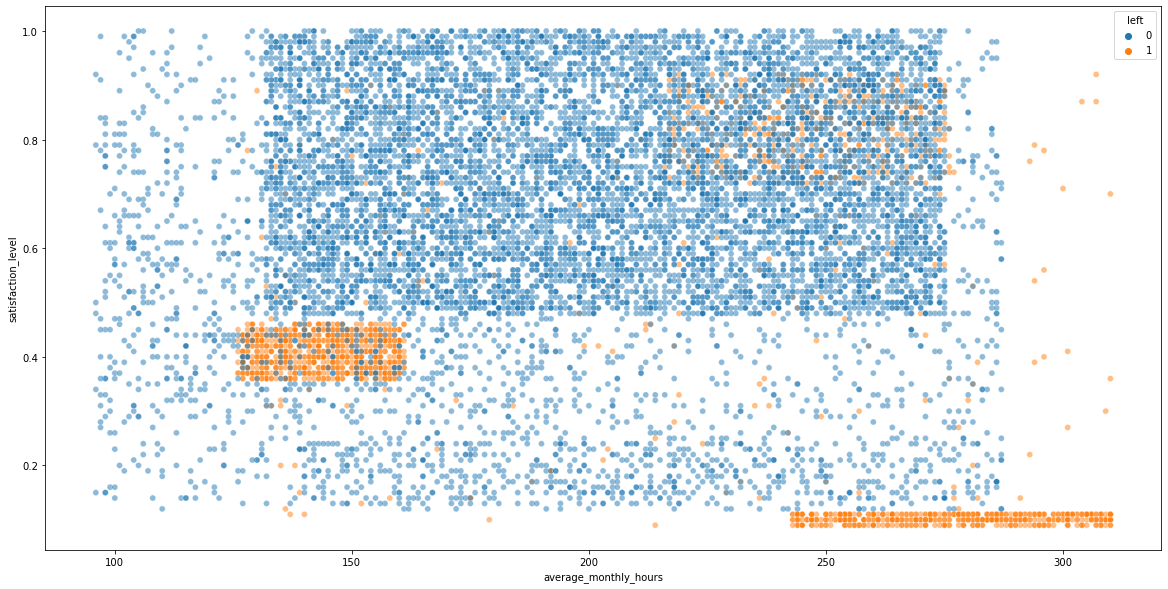

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df0, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.show()

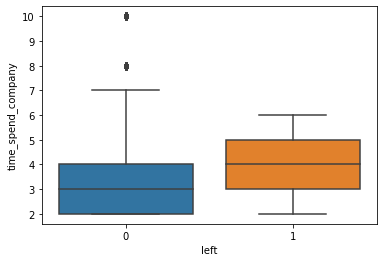

In [61]:
sns.boxplot(data=df0, x='left', y='time_spend_company')

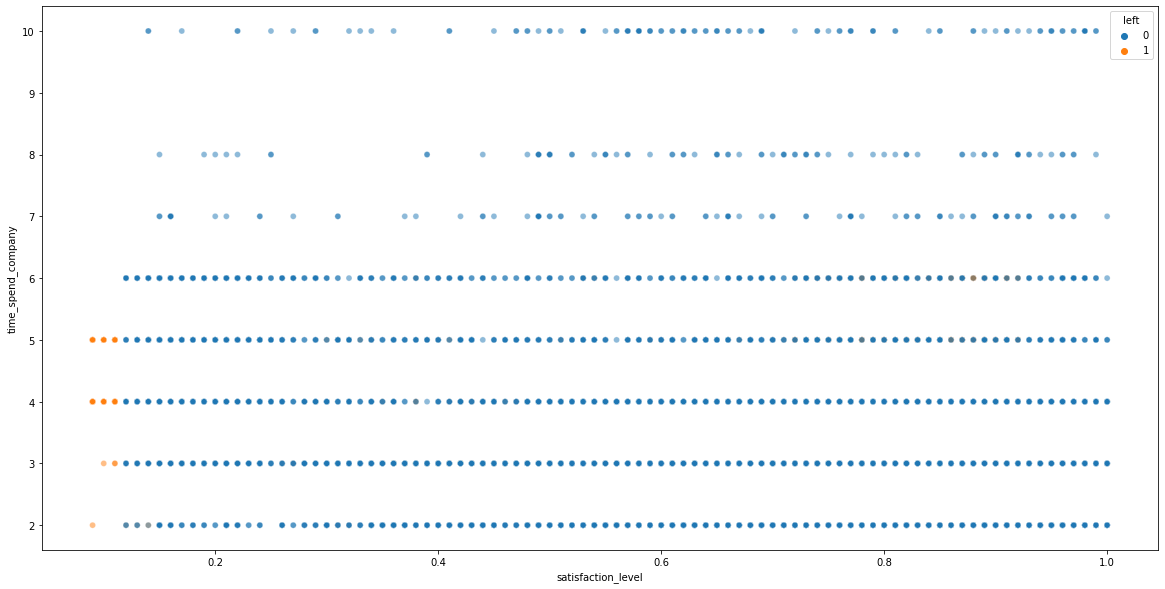

In [62]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df0, x='satisfaction_level', y='time_spend_company', hue='left', alpha=0.5)
plt.show()

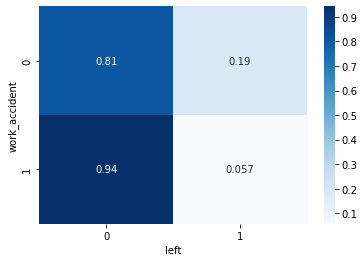

In [63]:
ct = pd.crosstab(df0['work_accident'], df0['left'], normalize='index')
sns.heatmap(ct, annot=True, cmap='Blues')

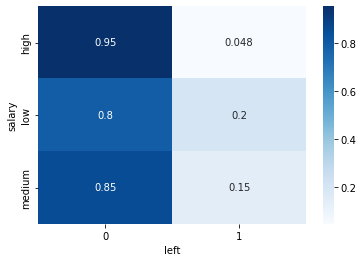

In [64]:
ct = pd.crosstab(df0['salary'], df0['left'], normalize='index')
sns.heatmap(ct, annot=True, cmap='Blues')

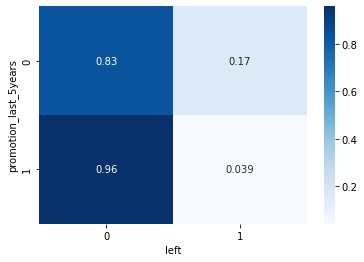

In [65]:
ct = pd.crosstab(df0['promotion_last_5years'], df0['left'], normalize='index')
sns.heatmap(ct, annot=True, cmap='Blues')

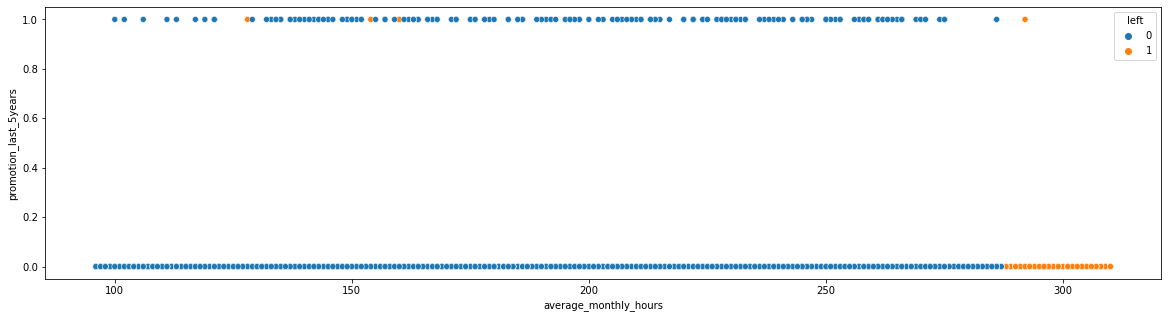

In [66]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df0, x='average_monthly_hours', y='promotion_last_5years', hue='left')
plt.show()

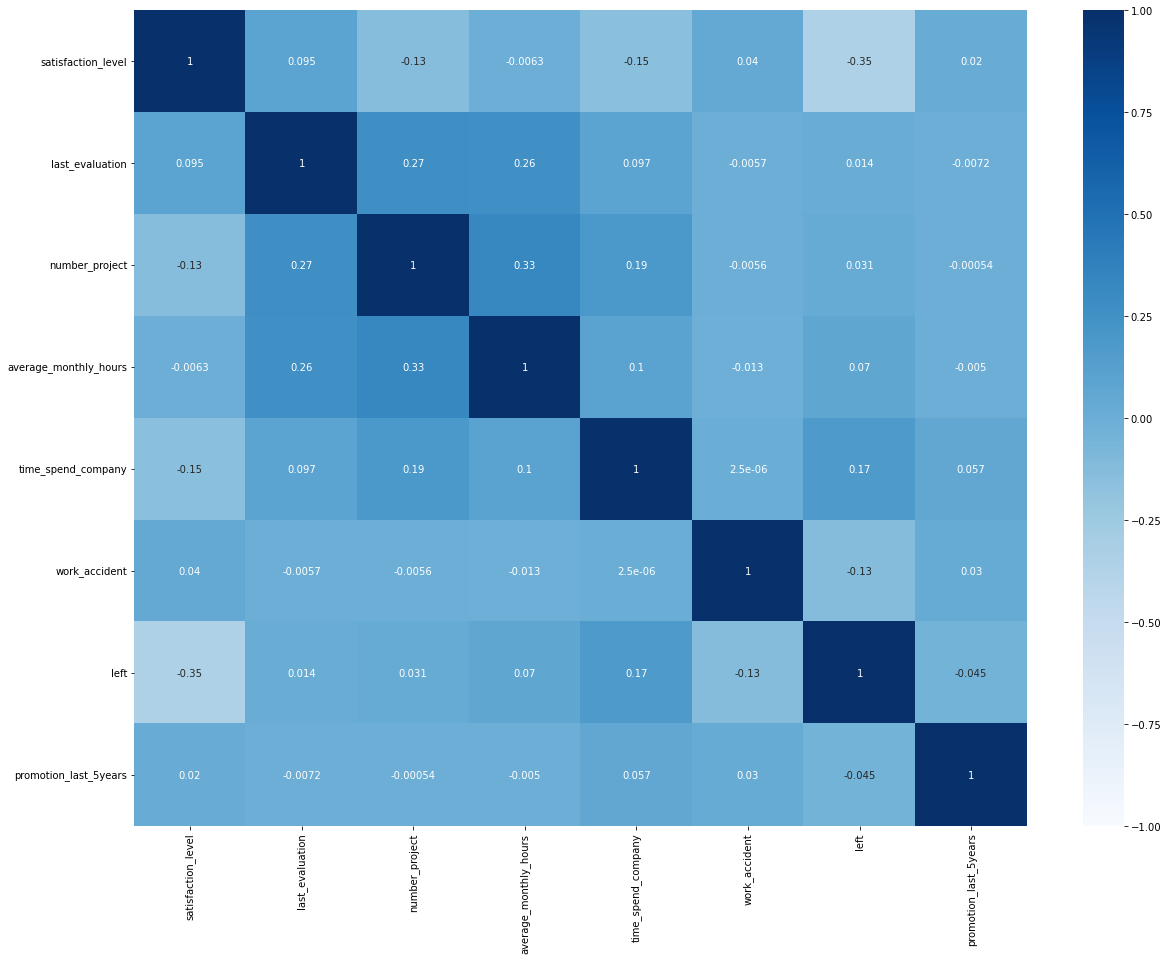

In [83]:
plt.figure(figsize=(20,15))
sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

### Modeling

In [14]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [18]:
df0 = pd.get_dummies(df0, drop_first=True)

In [76]:
X = df0.drop(columns=['left'])
y = df0['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### 1. RandomForest

In [12]:
rf = RandomForestClassifier()
cv_params = {
    'max_depth': [None, 10, 20, 40],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [100, 200, 300, 400, 500]
}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
clf = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [15]:
clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 300}

In [16]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
clf.best_score_

0.9816177055957225

In [19]:
cv_results = pd.DataFrame(clf.cv_results_)
max_scores = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]
auc = max_scores['mean_test_roc_auc']
accuracy = max_scores['mean_test_accuracy']
precision = max_scores['mean_test_precision']
recall = max_scores['mean_test_recall']
f1 = max_scores['mean_test_f1']
auc = max_scores['mean_test_roc_auc']
results = pd.DataFrame({'model':['RandomForest'],'accuracy':[accuracy],'precision':[precision],'recall':[recall],'f1':[f1],'auc':[auc]})

In [20]:
results

,model,accuracy,precision,recall,f1,auc
0,RandomForest,0.980713,0.980254,0.902078,0.93952,0.981618


In [25]:
results.to_csv('/home/jovyan/work/result.csv', index=False)

### 2. DecisionTree

In [29]:
dt = DecisionTreeClassifier()
cv_params = {
    'max_depth': [None, 10, 20, 40],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'min_samples_split': [2, 5, 10, 20]
}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
clf_dt = GridSearchCV(dt, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit='roc_auc')
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 40],
                      

In [30]:
clf_dt.best_score_

0.9654846817452374

In [34]:
cv_results = pd.DataFrame(clf_dt.cv_results_)
max_scores = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]
auc = max_scores['mean_test_roc_auc']
accuracy = max_scores['mean_test_accuracy']
precision = max_scores['mean_test_precision']
recall = max_scores['mean_test_recall']
f1 = max_scores['mean_test_f1']
auc = max_scores['mean_test_roc_auc']
results = pd.concat([results, pd.DataFrame({'model':['DecisionTree'],'accuracy':[accuracy],'precision':[precision],'recall':[recall],'f1':[f1],'auc':[auc]})])

In [35]:
results

,model,accuracy,precision,recall,f1,auc
0,RandomForest,0.980713,0.980254,0.902078,0.939520,0.981618
0,DecisionTree,0.981965,0.982932,0.907108,0.943455,0.965485


In [36]:
results.to_csv('/home/jovyan/work/result.csv', index=False)

### 3. XGBoost

In [25]:
gbdt = XGBClassifier()
cv_params = {
    'min_child_weight': [1, 8, 16],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 1200]
}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
clf_gbdt = GridSearchCV(gbdt, cv_params, scoring=scoring, cv=5, n_jobs=-1, refit='roc_auc')
clf_gbdt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, ...),
             iid='depreca

In [27]:
clf_gbdt.best_params_

{'learning_rate': 0.1, 'min_child_weight': 1, 'n_estimators': 100}

In [28]:
clf_gbdt.best_score_

0.9877219858253274

In [29]:
cv_results = pd.DataFrame(clf_gbdt.cv_results_)
max_scores = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]
auc = max_scores['mean_test_roc_auc']
accuracy = max_scores['mean_test_accuracy']
precision = max_scores['mean_test_precision']
recall = max_scores['mean_test_recall']
f1 = max_scores['mean_test_f1']
auc = max_scores['mean_test_roc_auc']
results = pd.read_csv('/home/jovyan/work/result.csv')
results = pd.concat([results, pd.DataFrame({'model':['GBDT'],'accuracy':[accuracy],'precision':[precision],'recall':[recall],'f1':[f1],'auc':[auc]})])
results.to_csv('/home/jovyan/work/result.csv', index=False)

### 4. Results

In [31]:
results

,model,accuracy,precision,recall,f1,auc
0,RandomForest,0.980713,0.980254,0.902078,0.939520,0.981618
1,DecisionTree,0.981965,0.982932,0.907108,0.943455,0.965485
0,GBDT,0.983840,0.978091,0.923416,0.949920,0.987722


- GBDT has the best score in terms of accuracy, recall, f1, and auc.
- Simple decision tree has the best score in terms of precision.

In [72]:
# feature importances of the GBDT model
df_importances = pd.DataFrame(data={'feature':X.columns, 'importance':clf_gbdt.best_estimator_.feature_importances_})
df_importances = df_importances.sort_values(by='importance', ascending=False).reset_index()
df_importances

,index,feature,importance
0,0,satisfaction_level,0.309027
1,4,time_spend_company,0.193350
2,2,number_project,0.178919
3,1,last_evaluation,0.108796
4,3,average_monthly_hours,0.054172
5,5,work_accident,0.033423
6,17,salary_medium,0.016975
7,16,salary_low,0.015241
8,13,department_sales,0.015223
9,14,department_support,0.012633


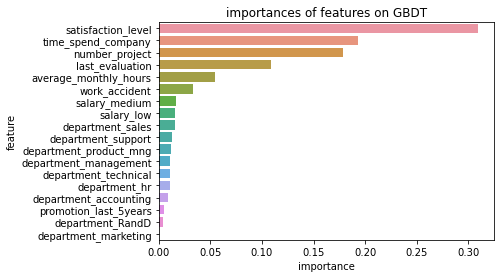

In [74]:
sns.barplot(data=df_importances, x='importance', y='feature')
plt.title('importances of features on GBDT')
plt.show()